In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X=df.iloc[:,[2, 3]]
X.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [4]:
y=df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=33)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [7]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.describe()

,Age,EstimatedSalary
count,3.200000e+02,320.000000
mean,2.761680e-16,0.000000
std,1.001566e+00,1.001566
min,-1.873607e+00,-1.607114
25%,-7.926208e-01,-0.756936
50%,-6.449065e-03,-0.039829
75%,7.797226e-01,0.522028
max,2.253795e+00,2.385027


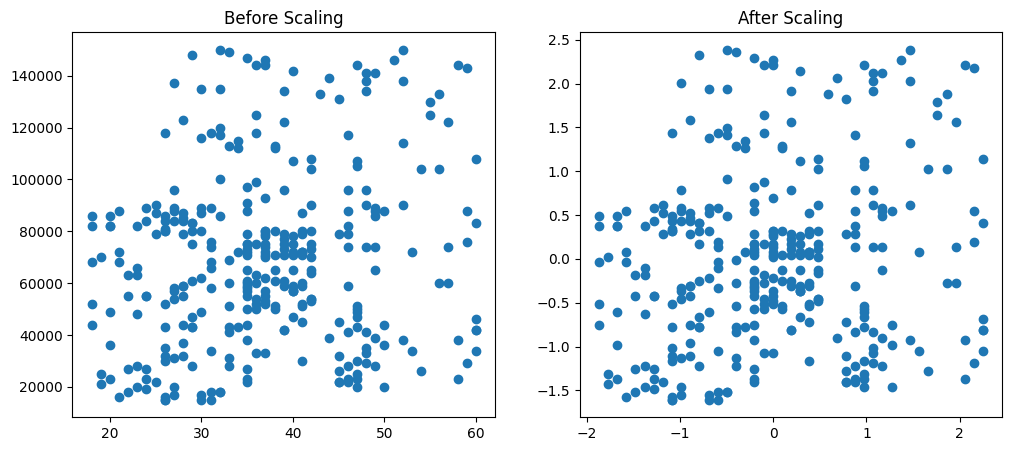

In [8]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")

plt.show()

In [9]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train_scaled, y_train)

GaussianNB()

In [10]:
y_pred=clf.predict(X_test_scaled)

C:\Users\khadk\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [12]:
print('the accuracy is', ac)
print('the cm is', cm)

the accuracy is 0.9375
the cm is [[44  3]
 [ 2 31]]
